In [298]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
import sklearn.cluster as cluster
from scipy.stats import multivariate_normal, dirichlet

np.random.seed(42)

In [172]:
# Gaussian Mixture Model Parameters
# Pis
pi = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Means
means = [
    [-10.0, 0.0],
    [0.0, -10.0],
    [10.0, 0.0],
    [0.0, 10.0],
    [-5.0, 4.5],
    [5.0, 4.5],
    [0.0, -0.5],
    [0.0, -7.5],
    [-7.0, -5.5],
    [7.0, -5.5],
]

# Sigmas
covs = [
    [[0.1, 0.0], [0.0, 15.0]],
    [[15.0, 0.0], [0.0, 0.1]],
    [[0.1, 0.0], [0.0, 15.0]],
    [[15.0, 0.0], [0.0, 0.1]],
    [[3.0, 0.0], [0.0, 0.1]],
    [[1.0, 0.0], [0.0, 1.0]],
    [[0.1, 0.0], [0.0, 3.0]],
    [[4.0, 0.0], [0.0, 0.1]],
    [[0.5500000000000002, -0.45], [-0.45, 0.5499999999999999]],
    [[0.5500000000000002, 0.45], [0.45, 0.5499999999999999]],
]

In [173]:
# Generate synthetic data from the GMM
def generate_data(n_samples=1000):
    data = []
    labels = []
    for i, (mean, cov) in enumerate(zip(means, covs)):
        n = int(n_samples * pi[i])
        samples = np.random.multivariate_normal(mean, cov, n)
        data.append(samples)
        labels.extend([i] * n)
    return np.vstack(data), np.array(labels)


data, labels = generate_data()

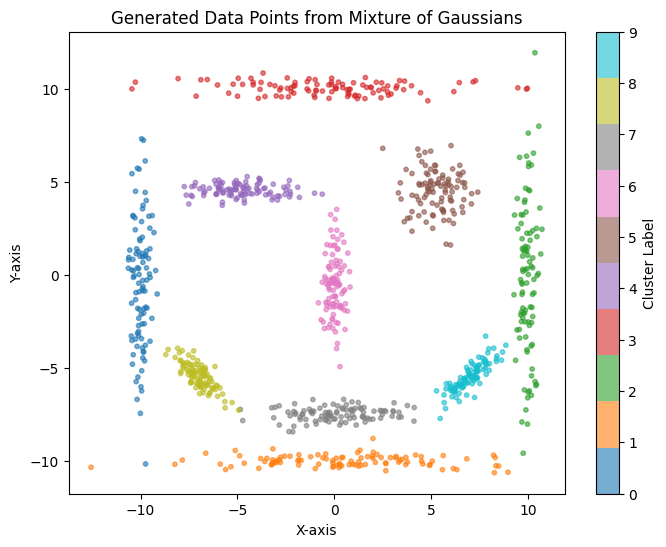

In [295]:
# Visualize the true distribution
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, c=labels, cmap="tab10", s=10)
plt.title("Generated Data Points from Mixture of Gaussians")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.colorbar(label="Cluster Label")

Converged after 22 iterations
ARI: 0.7183348045400804


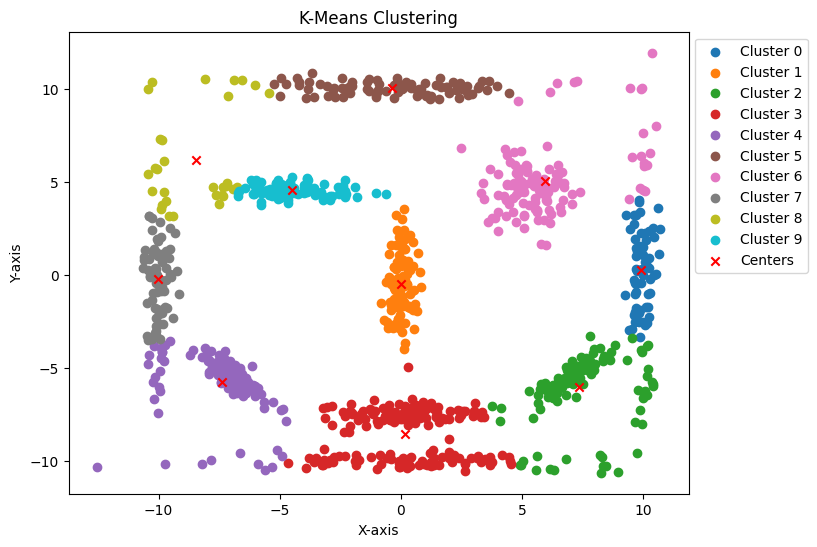

In [432]:
# 1. K-Means Clustering

def run_kmeans(data, n_clusters=3):
    random_state = 42
    predictions = np.random.randint(0, n_clusters, size=len(data))
    centers = np.random.rand(n_clusters, data.shape[1])

    # TODO: Implement K-Means Algorithm
    max_interations = 300
    tolerance = 1e-10

    for iter in range(max_interations):
        # Assign each data point to the closest center
        new_predictions = np.zeros_like(predictions)
        for i, point in enumerate(data):
            distances = np.linalg.norm(centers - point, axis=1)
            new_predictions[i] = np.argmin(distances)
        
        # Update the centers
        new_centers = np.zeros_like(centers)
        for j in range(n_clusters):
            if np.any(new_predictions == j):
                new_centers[j] = np.mean(data[new_predictions == j], axis=0)
            else:
                new_centers[j] = np.random.rand(data.shape[1])

        # Check for convergence
        sum = 0
        for i in range(n_clusters):
            sum += np.linalg.norm(new_centers[i] - centers[i])
        if sum < tolerance:
            print(f"Converged after {iter+1} iterations")
            break
        # if np.all(np.abs(new_centers - centers) < tolerance):
        #     print(f"Converged after {iter+1} iterations")
        #     break

        predictions = new_predictions
        centers = new_centers
    return predictions, centers

n_clusters = len(pi)
kmeans_predictions, centers = run_kmeans(data, n_clusters)

# Plot K-Means Results
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(
        data[kmeans_predictions == i, 0], data[kmeans_predictions == i, 1], label=f"Cluster {i}"
    )
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="x", label="Centers")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
# plt.legend()
plt.title("K-Means Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.savefig("Kmeans_clustering.png")
print(f"ARI: {adjusted_rand_score(labels, kmeans_predictions)}")

In [287]:
# np.save('kmeans_predictions.npy', kmeans_predictions)
# np.save('centers.npy', centers)

# for i in range(n_clusters):
#     print(f"{i} & {centers[i,0]:.3f} & {centers[i,1]:.2f} \\\\")

0 & 0.009 & -0.50 \\
1 & 5.841 & 5.08 \\
2 & 0.155 & -8.56 \\
3 & -7.363 & -5.76 \\
4 & 7.383 & -6.01 \\
5 & 9.931 & 0.48 \\
6 & -4.500 & 4.54 \\
7 & -10.008 & -0.21 \\
8 & -8.471 & 6.14 \\
9 & -0.358 & 10.02 \\


Iteration 0/700
Iteration 10/700
Iteration 20/700
Iteration 30/700
Iteration 40/700
Iteration 50/700
Iteration 60/700
Iteration 70/700
Iteration 80/700
Iteration 90/700
Iteration 100/700
Iteration 110/700
Iteration 120/700
Iteration 130/700
Iteration 140/700
Iteration 150/700
Iteration 160/700
Iteration 170/700
Iteration 180/700
Iteration 190/700
Iteration 200/700
Iteration 210/700
Iteration 220/700
Iteration 230/700
Iteration 240/700
Iteration 250/700
Iteration 260/700
Iteration 270/700
Iteration 280/700
Iteration 290/700
Iteration 300/700
Iteration 310/700
Iteration 320/700
Iteration 330/700
Iteration 340/700
Iteration 350/700
Iteration 360/700
Iteration 370/700
Iteration 380/700
Iteration 390/700
Iteration 400/700
Iteration 410/700
Iteration 420/700
Iteration 430/700
Iteration 440/700
Iteration 450/700
Iteration 460/700
Iteration 470/700
Iteration 480/700
Iteration 490/700
Iteration 500/700
Iteration 510/700
Iteration 520/700
Iteration 530/700
Iteration 540/700
Iteration 550/700
Ite

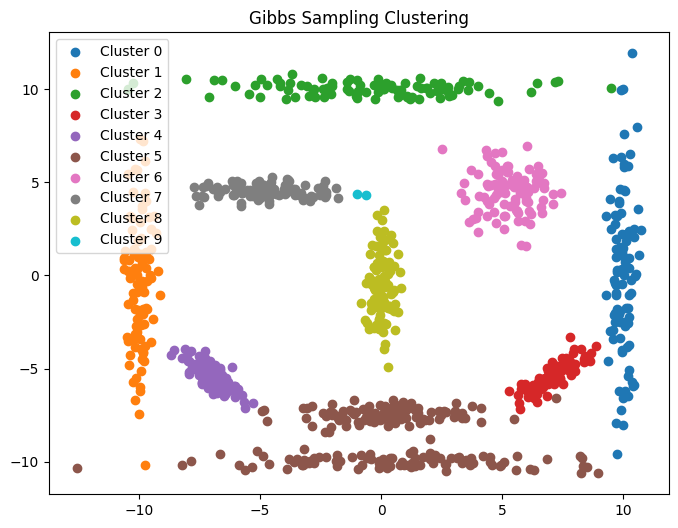

In [337]:
# 2. Gibbs Sampling for Clustering
def gibbs_sampling(data, n_clusters=3, n_samples=500, burn_in=200):
    n_points, dim = data.shape # n_points = 1000, dim = 2
    cluster_assignments = np.random.choice(n_clusters, n_points)

    counts = np.unique(cluster_assignments, return_counts=True)
    pi = counts[1] / n_points

    mu = np.array([np.mean(data[cluster_assignments == i],axis=0) for i in range(n_clusters)])
    
    Sigma = np.array([np.cov(data[cluster_assignments == i], rowvar=False) for i in range(n_clusters)])
    
    samples = []

    tot_iterations = n_samples + burn_in

    epsilon = 1e-6
    for i in range(tot_iterations):

        # Cluster assignments
        probabilities = np.zeros((n_points, n_clusters)) # 1000 x 10
        for j in range(n_points):
            for k in range(n_clusters):
                probabilities[j, k] = pi[k] * multivariate_normal.pdf(data[j], mu[k], Sigma[k])
            
            probabilities[j] /= np.sum(probabilities[j])
            cluster_assignments[j] = np.random.choice(n_clusters, p=probabilities[j])


        # Update parameters
        counts = np.unique(cluster_assignments, return_counts=True)
        pi = counts[1] / n_points
        for k in range(n_clusters):
            if counts[1][k] > 0:
                mu[k] = np.mean(data[cluster_assignments == k], axis=0)
                Sigma[k] = np.cov(data[cluster_assignments == k].T) + epsilon * np.eye(dim)
            else:
                pi[k] = 1e-10
                mu[k] = np.random.rand(dim)
                Sigma[k] = np.eye(dim)
                

        if i >= burn_in:
            samples.append(cluster_assignments.copy())
        
        if i % 10 == 0:
            print(f"Iteration {i}/{tot_iterations}")

    for i in range(n_points):
        label_count = np.zeros(n_clusters)
        for j in range(n_samples):
            label_count[samples[j][i]] += 1
        cluster_assignments[i] = np.argmax(label_count)
            
    return cluster_assignments


gibbs_predictions = gibbs_sampling(data, n_clusters)

# Plot Gibbs Sampling Results
plt.figure(figsize=(8, 6))
for i in range(len(pi)):
    plt.scatter(
        data[gibbs_predictions == i, 0],
        data[gibbs_predictions == i, 1],
        label=f"Cluster {i}",
    )
plt.title("Gibbs Sampling Clustering")
plt.legend()

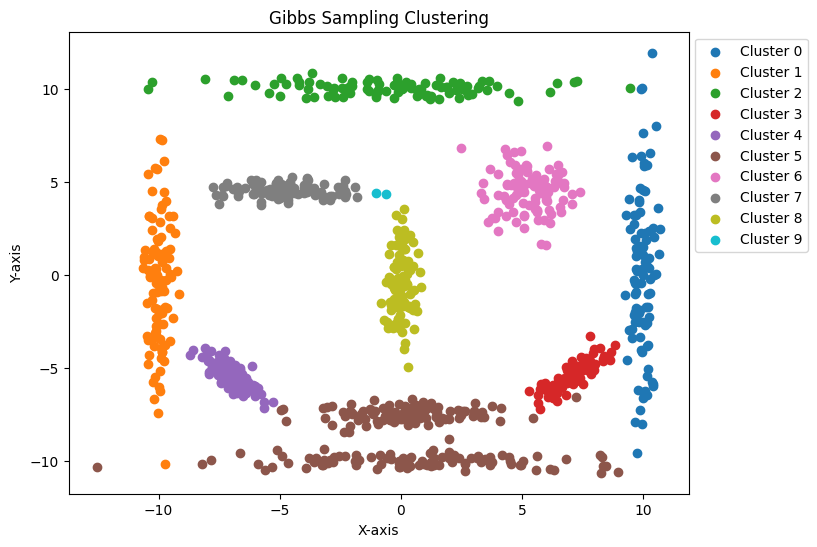

In [349]:
# Plot Gibbs Sampling Results
plt.figure(figsize=(8, 6))
for i in range(len(pi)):
    plt.scatter(
        data[gibbs_predictions == i, 0],
        data[gibbs_predictions == i, 1],
        label=f"Cluster {i}",
    )
plt.title("Gibbs Sampling Clustering")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.savefig("Gibbs_sampling_clustering.png")

Std: 0.010000000000000002 Acceptance Rate: 0.0 Burn-in Acceptance Rate: 0.0 Sampling Acceptance Rate: 0.0


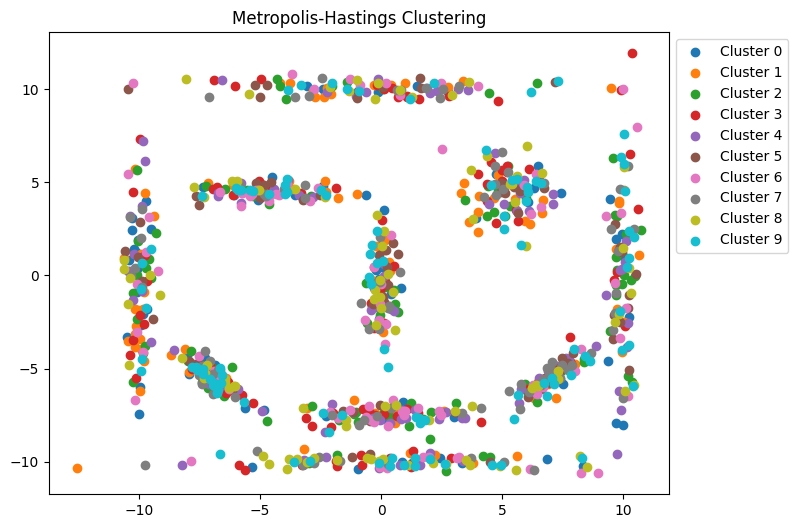

Std: 0.1 Acceptance Rate: 0.018915714285714286 Burn-in Acceptance Rate: 0.049165 Sampling Acceptance Rate: 0.006816


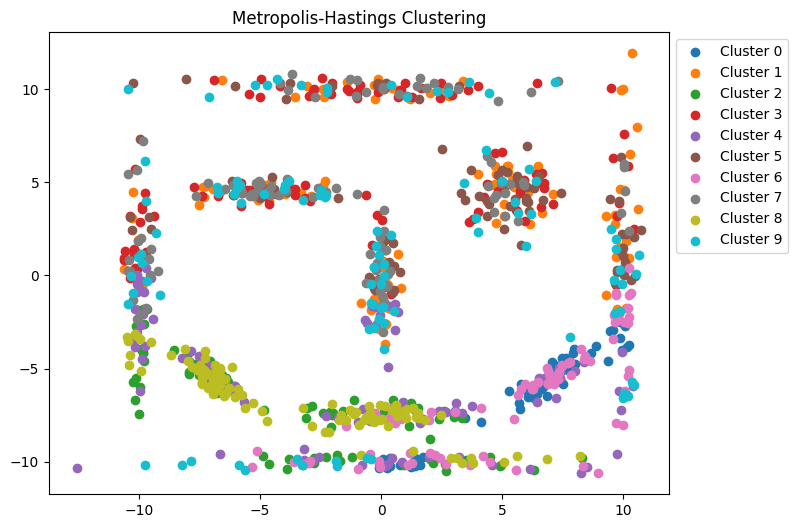

Std: 1.0 Acceptance Rate: 0.035725714285714284 Burn-in Acceptance Rate: 0.08787 Sampling Acceptance Rate: 0.014868


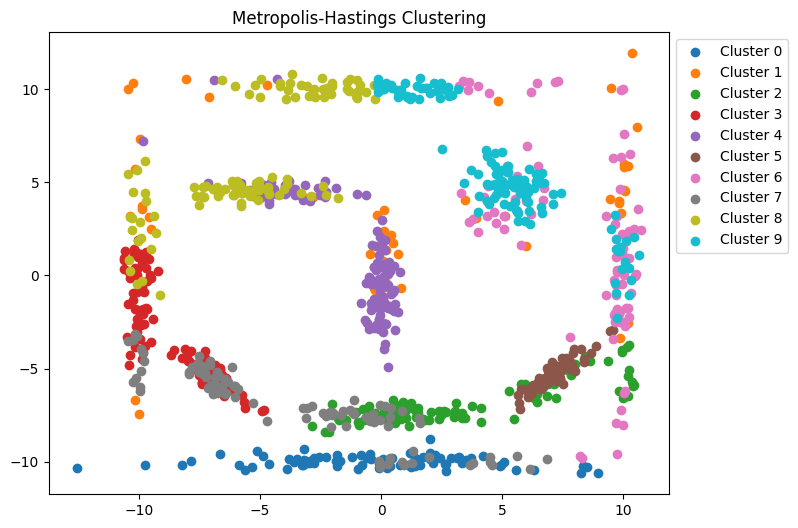

Std: 10.000000000000002 Acceptance Rate: 0.03521285714285714 Burn-in Acceptance Rate: 0.11874 Sampling Acceptance Rate: 0.001802


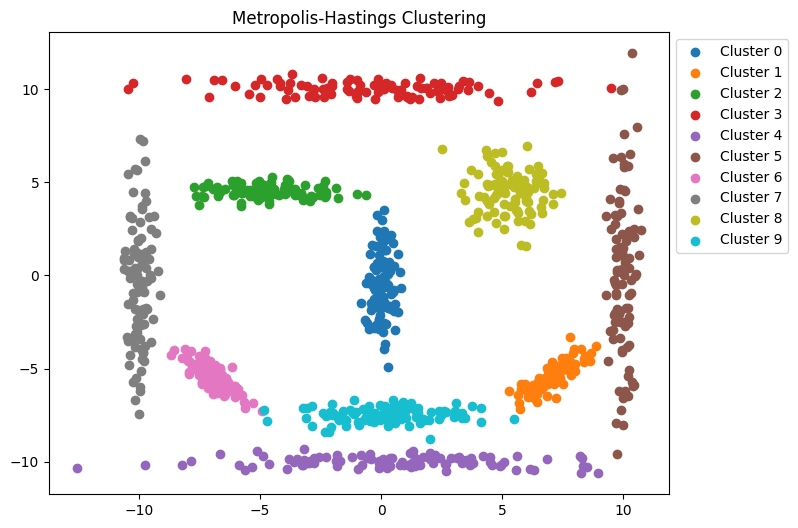

In [ ]:
# 3. Metropolis-Hastings for Clustering
def metropolis_hastings(
    data, n_clusters=3, proposal_std=1.0, n_samples=500, burn_in=200
):
    n_points, dim = data.shape
    cluster_assignments = np.random.choice(n_clusters, n_points)

    counts = np.bincount(cluster_assignments, minlength=n_clusters)

    epsilon = 1e-6

    tot_iterations = n_samples + burn_in

    samples = []
    tot_acceptance = 0
    tot_acceptance_burnin = 0
    tot_acceptance_sampling = 0

    for iteration in range(tot_iterations):
        new_cluster_assignments = cluster_assignments.copy()
        for i in range(n_points):
            current_cluster = cluster_assignments[i]
            proposed_cluster_1 = np.random.normal(current_cluster, proposal_std)
            proposed_cluster = int(round(proposed_cluster_1)) % n_clusters

            if proposed_cluster == current_cluster:
                continue
            
            # Compute likelihood
            likelihood_current = compute_likelihood(data,cluster_assignments,current_cluster,i,dim,epsilon)
            likelihood_proposed = compute_likelihood(data,cluster_assignments,proposed_cluster,i,dim,epsilon)
            acceptance_ratio =  likelihood_proposed / likelihood_current
            alpha = min(1,acceptance_ratio)

            if np.random.rand() < alpha:
                new_cluster_assignments[i] = proposed_cluster
                tot_acceptance += 1
                if iteration < burn_in:
                    tot_acceptance_burnin += 1
                else:
                    tot_acceptance_sampling += 1

        cluster_assignments = new_cluster_assignments

        if iteration >= burn_in:
            samples.append(cluster_assignments.copy())

    for i in range(n_points):
        label_count = np.zeros(n_clusters)
        for j in range(n_samples):
            label_count[samples[j][i]] += 1
        cluster_assignments[i] = np.argmax(label_count)

    print(f"Std: {std**2} Acceptance Rate: {tot_acceptance / (n_points * tot_iterations)}",
          f"Burn-in Acceptance Rate: {tot_acceptance_burnin / (n_points * burn_in)}",
          f"Sampling Acceptance Rate: {tot_acceptance_sampling / (n_points * n_samples)}")
    return cluster_assignments

def compute_likelihood(data,cluster_assignments,cluster,point_index,dim,epsilon):
    # Current cluster
    current_data = data[cluster_assignments == cluster]
    mu = np.mean(current_data,axis=0)
    Sigma = np.cov(current_data,rowvar=False) + epsilon * np.eye(dim)
    x = data[point_index]
    likelihood_current = multivariate_normal.pdf(x,mu,Sigma)

    return likelihood_current


proposal_variances = [0.01, 0.1, 1.0, 10.0]
cluster_assignments_all = []
for variance in proposal_variances:
    
    std = np.sqrt(variance)
    mh_predictions = metropolis_hastings(data, n_clusters, proposal_std=std)
    
    cluster_assignments_all.append(mh_predictions)
    # Plot Metropolis-Hastings Results
    plt.figure(figsize=(8, 6))
    for i in range(len(pi)):
        plt.scatter(
            data[mh_predictions == i, 0], data[mh_predictions == i, 1], label=f"Cluster {i}"
        )
    plt.title("Metropolis-Hastings Clustering")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
    plt.show()

In [433]:
for assignment in cluster_assignments_all:
    print(f"ARI: {adjusted_rand_score(labels, assignment)}")

ARI: 0.00068485312044507
ARI: 0.15106476970533875
ARI: 0.4443197486100371
ARI: 0.9888670642241403


In [434]:
# Evaluate Clustering Results

# Assuming true_labels is a numpy array containing the true labels of the data points
# and kmeans_predictions, gibbs_predictions, mh_predictions are the predicted labels

# Calculate ARI for each clustering method
kmeans_ari = adjusted_rand_score(labels, kmeans_predictions)
gibbs_ari = adjusted_rand_score(labels, gibbs_predictions)
mh_ari = adjusted_rand_score(labels, mh_predictions)

# Print the ARI results
print("Adjusted Rand Index of Clustering Methods:")
print(f"K-Means ARI: {kmeans_ari:.2f}")
print(f"Gibbs Sampling ARI: {gibbs_ari:.2f}")
print(f"Metropolis-Hastings ARI: {mh_ari:.2f}")


Adjusted Rand Index of Clustering Methods:
K-Means ARI: 0.72
Gibbs Sampling ARI: 0.88
Metropolis-Hastings ARI: 0.99


In [435]:
# Compare Results
print("Comparison of Clustering Results:")
print("K-Means Predictions:", np.bincount(kmeans_predictions))
print("Gibbs Sampling Predictions:", np.bincount(gibbs_predictions))
print("Metropolis-Hastings Predictions:", np.bincount(mh_predictions))

Comparison of Clustering Results:
K-Means Predictions: [ 67  99 137 173 129  84 121  69  31  90]
Gibbs Sampling Predictions: [102 100  98  98  99 203 100  98 100   2]
Metropolis-Hastings Predictions: [100  99 100  98 100 102 100  99 100 102]
